In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from matplotlib import cm
import matplotlib.gridspec as gridspec
#%matplotlib inline

load Data

In [3]:
wannier_xlat = np.loadtxt('../../Data/Wanner_3D_x.txt', delimiter = ',')
wannier_ylat = np.loadtxt('../../Data/Wanner_3D_y.txt', delimiter = ',')
wannier_lat = np.loadtxt('../../Data/Wanner_3D_rho.txt', delimiter = ',')

plotting

In [5]:
plt.style.use('../aps1.mplstyle')

No handles with labels found to put in legend.


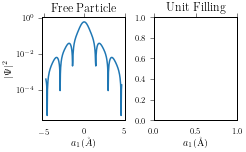

In [37]:
fig1 = plt.figure(constrained_layout=True)
spec1 = gridspec.GridSpec(ncols=2, nrows=1, figure=fig1)
f1_ax1 = fig1.add_subplot(spec1[0, 0])
plt.semilogy(wannier_xlat[289,144:432], wannier_lat[289,144:432])
plt.title("Free Particle")
plt.xlabel(r'$a_1(\AA)$')
plt.ylabel(r'$|\Psi|^2$')
plt.legend()

f1_ax2 = fig1.add_subplot(spec1[0, 1])
plt.title("Unit Filling")
plt.xlabel(r'$a_1$(\AA)')

plt.savefig('WannierCut.pdf', transparent=False) 
plt.savefig('WannierCut.svg', transparent=False) 